ref: https://machinelearningmastery.com/linear-regression-for-machine-learning/

In [1]:
!pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5586 sha256=a46313b57dbcc1a3e5f3971c263a48d7ecc33553deb238c51b344e3e3096a6b0
  Stored in directory: c:\users\akshatha\appdata\local\pip\cache\wheels\cb\f3\5a\d88198fdeb46781ddd7e7f2653061af83e7adb2a076d8886d6
Successfully built word2number


In [2]:
import numpy as np
import pandas as pd
import math
from sklearn import linear_model
import matplotlib.pyplot as plt
from word2number import w2n

In [9]:
df = pd.read_csv('../datasets/canada_per_capita_income.csv')
df.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


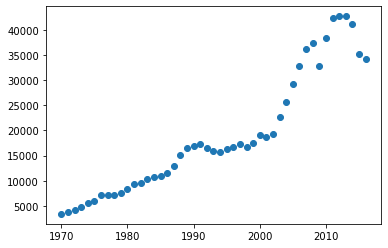

In [10]:
plt.scatter(df.year,df['per capita income (US$)'])

In [11]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df['per capita income (US$)'])

LinearRegression()

In [12]:
reg.predict([[2020]])

array([41288.69409442])

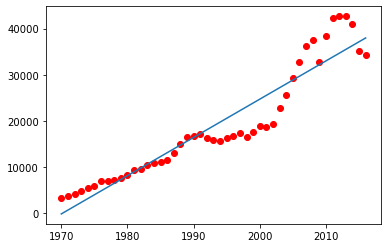

In [13]:
plt.scatter(df.year,df['per capita income (US$)'],color = 'red')
plt.plot(df.year,reg.predict(df[['year']]))

Linear regression multivariate

In [14]:
df2 = pd.read_csv('../datasets/hiring.csv')
df2.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [15]:
df2['experience'] = df2.experience.fillna('zero')
df2['experience'] = df2.experience.map(w2n.word_to_num)

In [16]:
med = df2.median(axis = 1, skipna = True)
df2['test_score(out of 10)'] = df2['test_score(out of 10)'].fillna(med)
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,10.0,7,72000
7,11,7.0,8,80000


In [17]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2[['experience','test_score(out of 10)','interview_score(out of 10)']],df2['salary($)'])

LinearRegression()

In [18]:
reg2.coef_

array([2687.80129471,  851.52196869, 2288.46242138])

In [19]:
reg2.intercept_

25292.68628621273

In [20]:
reg2.predict([[2,7,5]])

array([48071.25476333])

In [21]:
2687.80129471*2+851.52196869*7+2288.46242138*5+25292.686286212745

48071.25476336275

In [22]:
import pickle

In [23]:
with open('../datasets/reg_model','wb') as f: #binary file write mode
    pickle.dump(reg,f) #save trained model

In [24]:
with open('../datasets/reg_model','rb') as f: #binary file read mode
    model = pickle.load(f) #load trained model

In [25]:
model.predict([[2020]])

array([41288.69409442])

In [27]:
import joblib

In [28]:
joblib.dump(reg,'../datasets/reg_model_joblib')

['../datasets/reg_model_joblib']

In [29]:
model_jb = joblib.load('../datasets/reg_model_joblib')

In [30]:
model_jb.predict([[2020]])

array([41288.69409442])